In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline

In [ ]:
df = pd.read_csv('/Users/limdonggeon/Desktop/KPMG/Work/Law/data/BaseTable_2.csv')

/var/folders/fs/zfypqyv96hs22x794hfx0ycm0000gn/T/ipykernel_40827/2812542215.py:1: DtypeWarning: Columns (4,5,13,16,17,18,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BaseTable_2.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861624 entries, 0 to 861623
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   소관부처명      861624 non-null  object 
 1   법령명        861624 non-null  object 
 2   법령구분       861624 non-null  int64  
 3   조번호        861043 non-null  object 
 4   항번호        666511 non-null  object 
 5   호번호        504874 non-null  object 
 6   조문제목       861624 non-null  object 
 7   조문         861624 non-null  object 
 8   사무판단       861624 non-null  int64  
 9   사무판단근거     700810 non-null  object 
 10  사무명        60068 non-null   object 
 11  수행주체       60069 non-null   object 
 12  사무유형       60026 non-null   object 
 13  위임사무판단     761044 non-null  object 
 14  위임근거규정     5292 non-null    object 
 15  수임기관       4398 non-null    object 
 16  특행기관       93064 non-null   object 
 17  재위임사무판단    702426 non-null  object 
 18  재위임근거규정    53 non-null      object 
 19  재수임기관      13 non-null 

## 1. 사무판단 개수 파악

In [ ]:
df['사무판단'].unique()

array([0, 1, 2])

In [ ]:
# 개수 파악
N = len(df)
ratio_0 = (len(df[df['사무판단'] == 0]))/N *100
ratio_1 = (len(df[df['사무판단'] == 1]))/N *100

print(ratio_0,ratio_1)

93.03338811360872 6.966263706674837


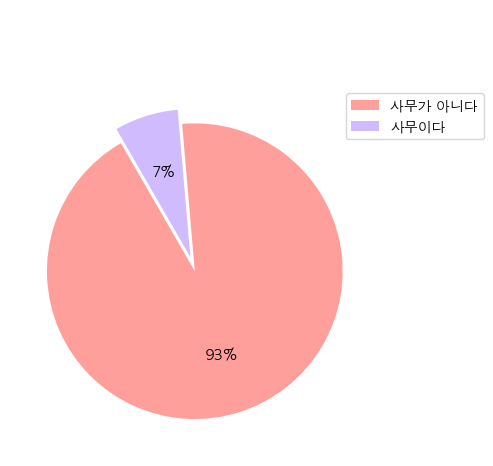

In [ ]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

ratio = [ratio_0, ratio_1]
labels = [0,1]
explode = [0, 0.10]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[3:5]

#create pie chart
plt.pie(ratio, colors = colors, autopct='%.0f%%', startangle= 120, explode=explode)
plt.legend(['사무가 아니다', '사무이다'], bbox_to_anchor=(1.3, 1))
plt.title('\n\n\n')
plt.show()


## 2. 소관부처명에 따른 사무판단

In [ ]:
df['소관부처명'].unique()

array(['개인정보보호위원회', '경찰청,대검찰청,법무부', '경찰청,해양경찰청', '경찰청',
       '경찰청,교육부,국토교통부,보건복지부', '경찰청,법무부', '고용노동부', '고용노동부,여성가족부',
       '공정거래위원회', '과학기술정보통신부', '과학기술정보통신부,방송통신위원회', '과학기술정보통신부,법무부',
       '과학기술정보통신부, 방송통신위원회', '교육부', '고용노동부,교육부', '교육부,행정안전부',
       '교육부,문화체육관광부', '과학기술정보통신부,교육부', '국가보훈처', '국가안보실', '국가정보원',
       '국가정보원,국무조정실', '국무조정실', '국무조정실,해양수산부', '가습기살균제사건과4.16세월호참사특별조사위원회',
       '국무총리비서실', '국민권익위원회', '국방부', '국방부,병무청', '국방부,행정안전부',
       '5.18민주화운동진상규명조사위원회', '국방부,방위사업청', '국방부,법무부', '국방부,방위사업청,산업통상자원부',
       '교육부,국방부', '국토교통부', '국토교통부,산업통상자원부', '환경부', '국토교통부,해양수산부',
       '국토교통부,환경부', '국토교통부,법무부', '국토교통부,행정중심복합도시건설청', '금융위원회',
       '금융위원회,법무부', '기상청', '기획재정부', '기획재정부,행정안전부', '농림축산식품부',
       '농림축산식품부,해양수산부', '농림축산식품부,농촌진흥청', '농림축산식품부,식품의약품안전처,해양수산부',
       '농촌진흥청', '대통령경호처', '대통령실', '문화재청', '문화체육관광부', '방송통신위원회', '법무부',
       '고용노동부,공정거래위원회,국토교통부,법무부,산업통상자원부,환경부', '행정안전부', '보건복지부', '법제처',
       '보건복지부,질병관리청', '보건복지부,식품의약품안전처', '국토교통부,보건복지부',
       '과학기술정보통신부,

In [ ]:
def law_work_count(i):
    a = len(df.loc[(df['소관부처명']==i) & (df['사무판단']==0), ])
    b = len(df.loc[(df['소관부처명']==i) & (df['사무판단']==1), ])

    #print(f"소관부처 {i}일때 ========")
    #print(f"사무x: {a}")
    #print(f"사무O: {b}")
    
    result = [b, a, i]
    return result

In [ ]:
result = []
for i in df['소관부처명'].unique():
    result.append(law_work_count(i))

In [ ]:
result.sort(key=lambda x:x[0], reverse = True)

In [ ]:
result[:10]

[[5496, 51473, '환경부'],
 [5266, 108493, '국토교통부'],
 [4684, 50751, '행정안전부'],
 [3922, 45776, '산업통상자원부'],
 [3730, 42779, '보건복지부'],
 [3643, 54249, '해양수산부'],
 [2933, 47704, '기획재정부'],
 [2342, 23501, '농림축산식품부'],
 [2331, 25350, '교육부'],
 [1946, 21453, '과학기술정보통신부']]

In [ ]:
task_num_by_department = []
department = []
for i in range(len(result)):
    task_num_by_department.append(result[i][0])
    department.append(result[i][2])

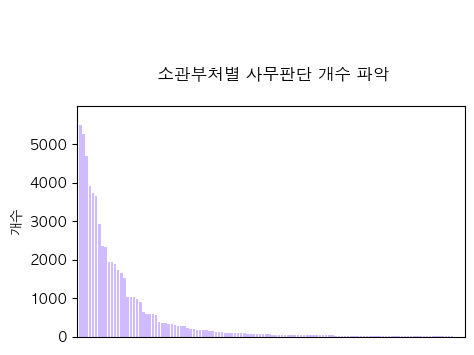

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
colors = sns.color_palette('pastel')[4]
#plt.scatter(range(len(result)),task_num_by_department,marker = '.')
plt.bar(range(len(task_num_by_department)), task_num_by_department, color=colors)
plt.title('\n\n\n 소관부처별 사무판단 개수 파악\n')
plt.ylabel('개수')
plt.xlim([-1,len(task_num_by_department)])
plt.xticks([])
plt.ylim([0,6000]);
plt.yticks(np.arange(0, 6000, step=1000));

In [ ]:
result[:10]

[[5496, 51473, '환경부'],
 [5266, 108493, '국토교통부'],
 [4684, 50751, '행정안전부'],
 [3922, 45776, '산업통상자원부'],
 [3730, 42779, '보건복지부'],
 [3643, 54249, '해양수산부'],
 [2933, 47704, '기획재정부'],
 [2342, 23501, '농림축산식품부'],
 [2331, 25350, '교육부'],
 [1946, 21453, '과학기술정보통신부']]

## 3. 법령에 따른 사무판단

In [ ]:
df['법령구분'].unique()

array([1, 2, 3])

In [ ]:
df['사무판단'].unique()

array([0, 1, 2])

In [ ]:
groups = ['1', '2', '3']
values1 = [len(df.loc[(df['법령구분']==1) & (df['사무판단']==0), ]), len(df.loc[(df['법령구분']==2) & (df['사무판단']==0), ]), len(df.loc[(df['법령구분']==3) & (df['사무판단']==0), ])]
values2 = [len(df.loc[(df['법령구분']==1) & (df['사무판단']==1), ]), len(df.loc[(df['법령구분']==2) & (df['사무판단']==1), ]), len(df.loc[(df['법령구분']==3) & (df['사무판단']==1), ])]

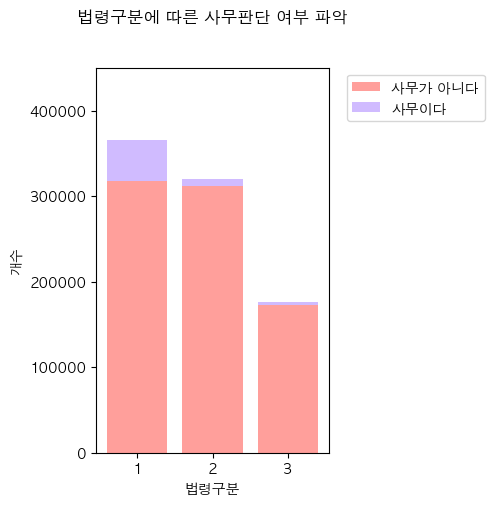

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
colors = sns.color_palette('pastel')[3:5]

# stack bar 로 구성
ax.bar(groups, values1, color = colors[0])
ax.bar(groups, values2, bottom = values1, color = colors[1])
plt.title('법령구분에 따른 사무판단 여부 파악\n\n')
plt.xlabel('법령구분')
plt.ylabel('개수')
plt.legend(['사무가 아니다', '사무이다'], bbox_to_anchor=(1.7, 1))
plt.ylim([0,450000])
plt.yticks(np.arange(0, 500000, step=100000))
plt.show()

In [ ]:
# def law_work_count(i):
#     a = len(df.loc[(df['법령구분']==i) & (df['사무판단']==0), ])
#     b = len(df.loc[(df['법령구분']==i) & (df['사무판단']==1), ])
#     c = len(df.loc[(df['법령구분']==i) & (df['사무판단']==2), ])

#     print(f"법령 구분 {i}일때 ========")
#     print(f"사무x: {a}")
#     print(f"사무O: {b}")
#     print(f"애매: {c}")
    

#     result = [a, b, c]
#     return result

In [ ]:
# result = []
# for i in range(1, 4):
#     result.append(law_work_count(i))
# result

In [ ]:
# # 법령 구분에 따른 사무판단 비율 계산
# ratio_df = df.groupby(['법령구분', '사무판단']).size().unstack().T
# ratio_df = ratio_df.div(ratio_df.sum(axis=1), axis=0)

# # 비율을 시각화
# ratio_df.T.plot(kind='bar', stacked=True)
# plt.title('법령구분에 따른 사무판단 비율')
# plt.xlabel('법령구분')
# plt.ylabel('Administrative Decision')
# plt.show()